# Iris dataset data analysis

**Author:** Alex Carneiro

**Course:** Moving2DS - Part 1

In [1]:
# importing libraries

import pandas as pd
import numpy as np

from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
%matplotlib inline

## Data reading and checking

In [2]:
dataset = pd.read_csv("../data/iris.data", header=None)
dataset.columns = ["sepal_l", "sepal_w",
                   "petal_l", "petal_w",
                   "class"]

print("Read %d samples from the dataset"%len(dataset))
dataset.sample(5)

Read 150 samples from the dataset


,sepal_l,sepal_w,petal_l,petal_w,class
130,7.4,2.8,6.1,1.9,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
63,6.1,2.9,4.7,1.4,Iris-versicolor
101,5.8,2.7,5.1,1.9,Iris-virginica
87,6.3,2.3,4.4,1.3,Iris-versicolor


In [3]:
print(dataset['class'].describe())

count                150
unique                 3
top       Iris-virginica
freq                  50
Name: class, dtype: object


In [4]:
for c in dataset['class'].unique():
    print("Class", c, "has", (dataset['class'] == c).sum(), "samples")

Class Iris-setosa has 50 samples
Class Iris-versicolor has 50 samples
Class Iris-virginica has 50 samples


In [5]:
columns = ["sepal_l", "sepal_w",
           "petal_l", "petal_w",
           "class"]

for c in columns:
    print("Data type of column", c, "is", dataset[c].dtype)

Data type of column sepal_l is float64
Data type of column sepal_w is float64
Data type of column petal_l is float64
Data type of column petal_w is float64
Data type of column class is object


In [6]:
any_null = []

for col in columns:
    any_null.append(any(dataset[col].isnull()))

if any(any_null):
    print("Those columns have NULL values:",
          [c for c, n in zip(columns, any_null) if n is True])
else:
    print("There are no NULL values")

There are no NULL values


## Data visualization

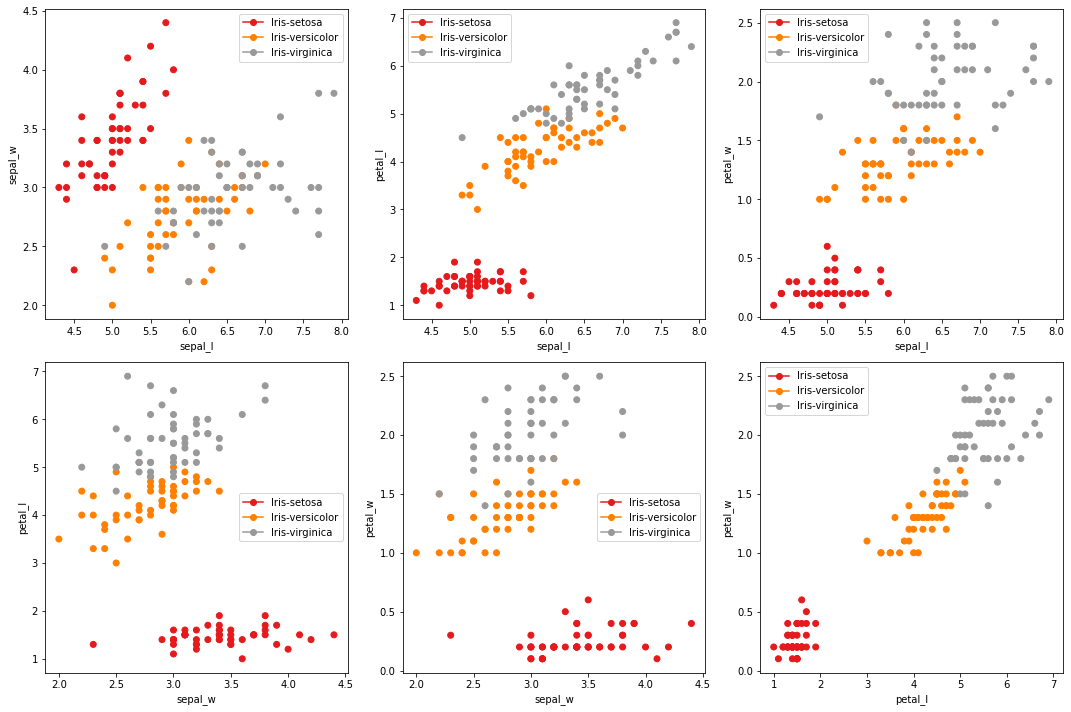

In [7]:
# sorted names of the classes as list of strings
cls = sorted(list(dataset['class'].unique()))
# lambda function that maps the strings to int values
convert = lambda i: cls.index(i)

# separate each dataset column into a variable
data_sepal_l = dataset['sepal_l'].values
data_sepal_w = dataset['sepal_w'].values
data_petal_l = dataset['petal_l'].values
data_petal_w = dataset['petal_w'].values
data_class = dataset['class'].values
data_class_int = dataset['class'].map(convert).values

cmap = plt.cm.get_cmap('Set1')
legend_elements = [Line2D([0], [0],
                          marker='o',
                          color=cmap(i/(len(cls)-1)),
                          label=c) for i, c in enumerate(cls)]

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.xlabel("sepal_l")
plt.ylabel("sepal_w")
plt.scatter(data_sepal_l, data_sepal_w, c=data_class_int, cmap=cmap);
plt.legend(handles=legend_elements, loc=1);

plt.subplot(2,3,2)
plt.xlabel("sepal_l")
plt.ylabel("petal_l")
plt.scatter(data_sepal_l, data_petal_l, c=data_class_int, cmap=cmap);
plt.legend(handles=legend_elements, loc=2);

plt.subplot(2,3,3)
plt.xlabel("sepal_l")
plt.ylabel("petal_w")
plt.scatter(data_sepal_l, data_petal_w, c=data_class_int, cmap=cmap);
plt.legend(handles=legend_elements, loc=2);

plt.subplot(2,3,4)
plt.xlabel("sepal_w")
plt.ylabel("petal_l")
plt.scatter(data_sepal_w, data_petal_l, c=data_class_int, cmap=cmap);
plt.legend(handles=legend_elements, loc=5);

plt.subplot(2,3,5)
plt.xlabel("sepal_w")
plt.ylabel("petal_w")
plt.scatter(data_sepal_w, data_petal_w, c=data_class_int, cmap=cmap);
plt.legend(handles=legend_elements, loc=5);

plt.subplot(2,3,6)
plt.xlabel("petal_l")
plt.ylabel("petal_w")
plt.scatter(data_petal_l, data_petal_w, c=data_class_int, cmap=cmap);
plt.legend(handles=legend_elements, loc=2);
plt.tight_layout();

## Some statistics

In [8]:
dataset_setosa = dataset[dataset['class'] == 'Iris-setosa']
dataset_versicolor = dataset[dataset['class'] == 'Iris-versicolor']
dataset_virginica = dataset[dataset['class'] == 'Iris-virginica']

In [9]:
columns = ["sepal_l", "sepal_w", "petal_l", "petal_w"]

print("Mean and variance for class 'Iris-setosa'")
for c in columns:
    mean = np.mean(dataset_setosa[c])
    var = np.var(dataset_setosa[c], ddof=1)
    
    print("Column:", c)
    print("Mean value =", mean)
    print("Variance value =", var)

print()
print("Mean and variance for class 'Iris-versicolor'")
for c in columns:
    mean = np.mean(dataset_versicolor[c])
    var = np.var(dataset_versicolor[c], ddof=1)
    
    print("Column:", c)
    print("Mean value =", mean)
    print("Variance value =", var)
    
print()
print("Mean and variance for class 'Iris-virginica'")
for c in columns:
    mean = np.mean(dataset_virginica[c])
    var = np.var(dataset_virginica[c], ddof=1)
    
    print("Column:", c)
    print("Mean value =", mean)
    print("Variance value =", var)

Mean and variance for class 'Iris-setosa'
Column: sepal_l
Mean value = 5.006
Variance value = 0.12424897959183677
Column: sepal_w
Mean value = 3.418
Variance value = 0.1451795918367347
Column: petal_l
Mean value = 1.464
Variance value = 0.030106122448979592
Column: petal_w
Mean value = 0.244
Variance value = 0.011493877551020411

Mean and variance for class 'Iris-versicolor'
Column: sepal_l
Mean value = 5.936
Variance value = 0.2664326530612245
Column: sepal_w
Mean value = 2.7700000000000005
Variance value = 0.09846938775510206
Column: petal_l
Mean value = 4.26
Variance value = 0.22081632653061228
Column: petal_w
Mean value = 1.3259999999999998
Variance value = 0.03910612244897959

Mean and variance for class 'Iris-virginica'
Column: sepal_l
Mean value = 6.587999999999998
Variance value = 0.4043428571428573
Column: sepal_w
Mean value = 2.974
Variance value = 0.10400408163265305
Column: petal_l
Mean value = 5.5520000000000005
Variance value = 0.30458775510204084
Column: petal_w
Mean val

In [10]:
print(dataset_setosa.describe())

        sepal_l    sepal_w    petal_l   petal_w
count  50.00000  50.000000  50.000000  50.00000
mean    5.00600   3.418000   1.464000   0.24400
std     0.35249   0.381024   0.173511   0.10721
min     4.30000   2.300000   1.000000   0.10000
25%     4.80000   3.125000   1.400000   0.20000
50%     5.00000   3.400000   1.500000   0.20000
75%     5.20000   3.675000   1.575000   0.30000
max     5.80000   4.400000   1.900000   0.60000


In [11]:
print(dataset_versicolor.describe())

         sepal_l    sepal_w    petal_l    petal_w
count  50.000000  50.000000  50.000000  50.000000
mean    5.936000   2.770000   4.260000   1.326000
std     0.516171   0.313798   0.469911   0.197753
min     4.900000   2.000000   3.000000   1.000000
25%     5.600000   2.525000   4.000000   1.200000
50%     5.900000   2.800000   4.350000   1.300000
75%     6.300000   3.000000   4.600000   1.500000
max     7.000000   3.400000   5.100000   1.800000


In [12]:
print(dataset_virginica.describe())

        sepal_l    sepal_w    petal_l   petal_w
count  50.00000  50.000000  50.000000  50.00000
mean    6.58800   2.974000   5.552000   2.02600
std     0.63588   0.322497   0.551895   0.27465
min     4.90000   2.200000   4.500000   1.40000
25%     6.22500   2.800000   5.100000   1.80000
50%     6.50000   3.000000   5.550000   2.00000
75%     6.90000   3.175000   5.875000   2.30000
max     7.90000   3.800000   6.900000   2.50000
